In [1]:
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import mixture
from sklearn.preprocessing import LabelEncoder, scale
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import GridSearchCV
from time import time
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn.metrics.cluster import v_measure_score,homogeneity_score,completeness_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA,FastICA, FactorAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from scipy.stats import kurtosis
from sklearn import random_projection,manifold
from matplotlib.pyplot import cm 
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


C:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
print("sklearn version:",sk.__version__)
print("numpy version:",np.__version__)
print("matplotlib version:",matplotlib.__version__)
print("pandas version:",pd.__version__)

sklearn version: 0.19.0
numpy version: 1.13.1
matplotlib version: 2.0.2
pandas version: 0.20.3


In [3]:
bc = pd.read_csv("breast_cancer.csv")

In [4]:
print("data shapes: ", bc.shape)

data shapes:  (569, 33)


In [5]:
bc.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
bc.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [7]:
bc = bc.drop(['id',"Unnamed: 32"],axis=1)

In [8]:
features, labels= bc.drop(["diagnosis"],axis=1),bc.diagnosis

In [9]:
print(labels.value_counts())
print()
print("Number of features:",features.shape[1])

B    357
M    212
Name: diagnosis, dtype: int64

Number of features: 30


In [10]:
features = scale(features)

In [11]:
le = LabelEncoder()
le.fit(labels)
dlabels = le.transform(labels)

In [12]:
original_dim = features.shape[1]
original_dim 

30

## Kmeans Clustering

In [13]:
def bench_k_means(Ks, X, Y, random_state):
    running_time = []
    sumOfDistance = []
    homogeneity_score = []
    completeness_score = []
    v_measure_score = []
    adjusted_rand_score = []
    adjusted_mutual_info_score = []
    silhouette_score = []
    for K in Ks:
        estimator = KMeans(n_clusters = K, random_state = random_state)
        t0 = time()
        estimator.fit(X)
        running_time.append(time() - t0)
        sumOfDistance.append(estimator.inertia_)
        homogeneity_score.append(metrics.homogeneity_score( Y, estimator.labels_))
        completeness_score.append(metrics.completeness_score( Y, estimator.labels_))
        v_measure_score.append(metrics.v_measure_score( Y, estimator.labels_))
        adjusted_rand_score.append(metrics.adjusted_rand_score( Y, estimator.labels_)) 
        adjusted_mutual_info_score.append(metrics.adjusted_mutual_info_score( Y,  estimator.labels_)) 
        silhouette_score.append(metrics.silhouette_score(X, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=X.shape[0]))
    
    performance_df = pd.DataFrame({"n_clusters":Ks,
                                   "running_time":running_time,
                                  "sum_of_distances":sumOfDistance,
                                  "homogeneity":homogeneity_score,
                                  "completeness":completeness_score,
                                  "v_measure_score":v_measure_score,
                                  "adjusted_rand_score":adjusted_rand_score,
                                  "adjusted_mutual_info_score": adjusted_mutual_info_score,
                                  "silhouette_score":silhouette_score
                                  })
    return performance_df
   

In [14]:
kmeans_performance_df = bench_k_means([i for i in range(2,11)],features,dlabels,random_state = 6)
kmeans_performance_df.n_clusters = kmeans_performance_df.n_clusters.astype(str)
kmeans_performance_df1 = kmeans_performance_df.set_index('n_clusters')

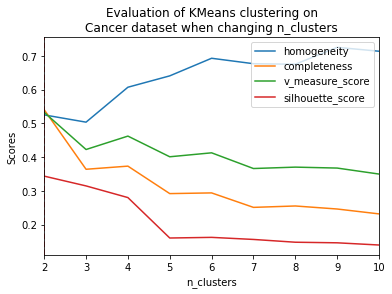

In [156]:
ax = kmeans_performance_df1[['homogeneity','completeness','v_measure_score','silhouette_score']].plot()
ax.set_ylabel("Scores")
ax.set_title("Evaluation of KMeans clustering on\nCancer dataset when changing n_clusters")
idxmax = [i for i in range(kmeans_performance_df1.shape[0]) if kmeans_performance_df1.index[i] == kmeans_performance_df1.idxmax()['silhouette_score']]
ax.axvline(x=idxmax[0],color='r',ls='--',alpha=0.9)
ax.legend(loc = 'upper right')
plt.savefig('pics/KMs_cancer.png')
plt.show()

In [16]:
kmeans_performance_df[['n_clusters','sum_of_distances','running_time']]

,n_clusters,sum_of_distances,running_time
0,2,11595.526607,0.104157
1,3,10061.797818,0.143138
2,4,9256.988836,0.127122
3,5,8554.022760,0.122117
4,6,7984.251482,0.121881
5,7,7543.935749,0.125020
6,8,7218.119411,0.125010
7,9,6818.020743,0.143320
8,10,6568.627528,0.153311


In [141]:
# Scale and visualize the embedding vectors                            
def plot_embedding(X,y, title=None):     
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)                           
    colors = cm.rainbow(np.linspace(0,1,2))
    plt.figure(figsize=(10,8))              
    ax = plt.subplot(111)      
    for i in range(X.shape[0]):  
                plt.text(X[i, 0], X[i, 1],str(y[i]),
                 color=colors[y[i]] ,         
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
    plot_margin = 0.05

    x0, x1, y0, y1 = plt.axis()
    plt.axis((x0 - plot_margin,
              x1 + plot_margin,
              y0 - plot_margin,
              y1 + plot_margin))

In [ ]:
tsne = manifold.TSNE(n_components=2, random_state=0)
pca_X_tsne = tsne.fit_transform(pca_X)

## EM Clustering

In [129]:
def bench_EMs(Ks, X, Y, random_state):
    running_time = []
    BIC = []
    homogeneity_score = []
    completeness_score = []
    v_measure_score = []
    adjusted_rand_score = []
    adjusted_mutual_info_score = []
    silhouette_score = []
    for K in Ks:
        estimator = mixture.GaussianMixture(n_components = K, random_state = random_state)
        t0 = time()
        estimator.fit(X)
        predicted = estimator.predict(X)
        running_time.append(time() - t0)
        BIC.append(estimator.bic(X))
        homogeneity_score.append(metrics.homogeneity_score( Y, predicted))
        completeness_score.append(metrics.completeness_score( Y, predicted))
        v_measure_score.append(metrics.v_measure_score( Y, predicted))
        adjusted_rand_score.append(metrics.adjusted_rand_score( Y, predicted)) 
        adjusted_mutual_info_score.append(metrics.adjusted_mutual_info_score( Y,  predicted)) 
        silhouette_score.append(metrics.silhouette_score(X, predicted,
                                      metric='euclidean',
                                      sample_size=X.shape[0]))
        
    performance_df = pd.DataFrame({"n_components":Ks,
                                   "running_time":running_time,
                                  "BIC":BIC,
                                  "homogeneity":homogeneity_score,
                                  "completeness":completeness_score,
                                  "v_measure_score":v_measure_score,
                                  "adjusted_rand_score":adjusted_rand_score,
                                  "adjusted_mutual_info_score": adjusted_mutual_info_score,
                                  "silhouette_score":silhouette_score
                                  })
    return performance_df
   

In [18]:
EMs_performance_df = bench_EMs([i for i in range(2,11)],features,labels,random_state = 6)
EMs_performance_df.n_components = EMs_performance_df.n_components.astype(str)
EMs_performance_df1 = EMs_performance_df.set_index('n_components')

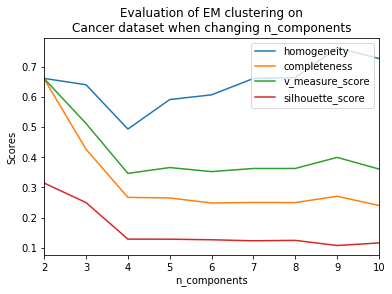

In [157]:
ax = EMs_performance_df1[['homogeneity','completeness','v_measure_score','silhouette_score']].plot()
ax.set_ylabel("Scores")
ax.set_title("Evaluation of EM clustering on\nCancer dataset when changing n_components")
idxmax = [i for i in range(EMs_performance_df1.shape[0]) if EMs_performance_df1.index[i] == EMs_performance_df1.idxmax()['silhouette_score']]
ax.axvline(x=idxmax[0],color='r',ls='--',alpha=0.5)
plt.savefig('pics/EMs_cancer.png')
plt.show()

In [20]:
EMs_performance_df[['n_components','BIC','running_time']]

,n_components,BIC,running_time
0,2,6094.040120,0.046877
1,3,6293.740915,0.089212
2,4,6457.979813,0.133402
3,5,7985.190165,0.088489
4,6,8072.093652,0.117660
5,7,9506.075720,0.060854
6,8,10339.269501,0.106374
7,9,11468.483552,0.205974
8,10,13290.723935,0.132049


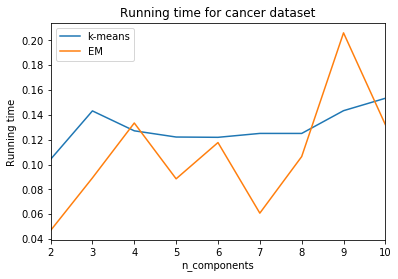

In [155]:
kmeans_performance_df1['running_time'].plot(label='k-means')
EMs_performance_df1['running_time'].plot(label='EM')
plt.ylabel('Running time')
plt.title('Running time for cancer dataset')
plt.legend()
plt.savefig('pics/clustering_running_time_cancer.png')

### Then i applied four dimension reduction algorithms (PCA, ICA, RP, and FA) to original data
### First we have to justify the ideal output dimension for each algorithms. Here I use a simple classifier Naive Bayes classifer to cross validate the hyper parameter n_components.

In [21]:
def compute_cv_scores(estimator, X, Y, n_components):
    scores = []
    for n in n_components:
        estimator.n_components = n
        tX = estimator.fit_transform(X)
        #use simple Naive Bayes classifer to cross validate n_components
        gb = GaussianNB()
        scores.append(np.mean(cross_val_score(gb, tX,Y,scoring='accuracy',cv=4)))
    return scores

In [22]:
n_components = [i for i in range(2,original_dim//2)]
pca = PCA(svd_solver='full',random_state=6)
pca_cv_scores = compute_cv_scores(pca,features,dlabels,n_components)
ica = FastICA(random_state=6)
ica_cv_scores = compute_cv_scores(ica,features,dlabels,n_components)
rp = random_projection.SparseRandomProjection(random_state=6)
rp_cv_scores = compute_cv_scores(rp,features,dlabels,n_components)
fa = FactorAnalysis(random_state=6)
fa_cv_scores = compute_cv_scores(fa,features,dlabels,n_components)

In [23]:
cv_n_components_df = pd.DataFrame()
cv_n_components_df['n_components'] = n_components
cv_n_components_df['pca'] = pca_cv_scores
cv_n_components_df['ica'] = ica_cv_scores
cv_n_components_df['rp'] = rp_cv_scores
cv_n_components_df['fa'] = fa_cv_scores

In [24]:
cv_n_components_df.n_components = cv_n_components_df.n_components.astype('str')
cv_n_components_df.set_index('n_components',inplace=True)

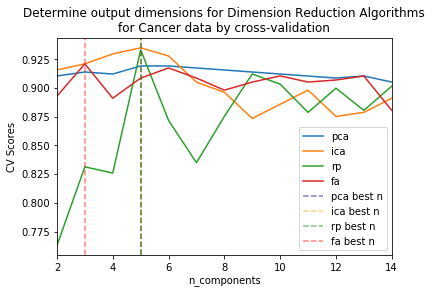

In [126]:
ax = cv_n_components_df.plot(title = "Determine output dimensions for Dimension Reduction Algorithms\nfor Cancer data by cross-validation")
idxmax_pca = [i for i in range(cv_n_components_df.shape[0]) if cv_n_components_df.index[i] == cv_n_components_df.idxmax()['pca']]
ax.axvline(x=idxmax_pca[0],color='navy',ls='--',alpha=0.5,label = 'pca best n')
idxmax_ica = [i for i in range(cv_n_components_df.shape[0]) if cv_n_components_df.index[i] == cv_n_components_df.idxmax()['ica']]
ax.axvline(x=idxmax_ica[0],color='orange',ls='--',alpha=0.5,label = 'ica best n')
idxmax_rp = [i for i in range(cv_n_components_df.shape[0]) if cv_n_components_df.index[i] == cv_n_components_df.idxmax()['rp']]
ax.axvline(x=idxmax_rp[0],color='green',ls='--',alpha=0.5,label = 'rp best n')
idxmax_fa = [i for i in range(cv_n_components_df.shape[0]) if cv_n_components_df.index[i] == cv_n_components_df.idxmax()['fa']]
ax.axvline(x=idxmax_fa[0],color='red',ls='--',alpha=0.5,label = 'fa best n')
ax.set_ylabel('CV Scores')
ax.legend(loc='lower right')
plt.savefig('pics/Evaluate_n_components_cancer.png')
plt.show()

Best output dimensions for PCA, ICA, RP and FA are

In [26]:
n_components[idxmax_pca[0]],n_components[idxmax_ica[0]],n_components[idxmax_rp[0]],n_components[idxmax_fa[0]]

(5, 5, 5, 3)

### PCA for dimension reduction from 30 to 5

In [27]:
pca = PCA(svd_solver='full',n_components=5,random_state=6)
pca.fit(features)
pca_X = pca.transform(features)

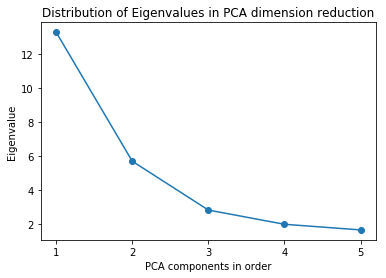

In [124]:
eigenvalues_pca = pca.explained_variance_
plt.plot([1,2,3,4,5],eigenvalues_pca,'-o')
plt.title("Distribution of Eigenvalues in PCA dimension reduction")
plt.xlabel("PCA components in order")
plt.ylabel('Eigenvalue')
plt.xticks(range(1,6))
plt.savefig('pics/pca_eigenvalues_cancer.png')
plt.show()

In [29]:
pca_X.shape

(569, 5)

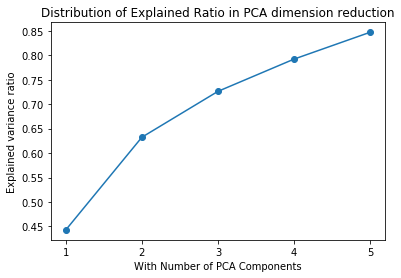

In [125]:
pca_exp = pca.explained_variance_ratio_
plt.plot([1,2,3,4,5],np.cumsum(pca_exp),'-o')
plt.title("Distribution of Explained Ratio in PCA dimension reduction")
plt.xlabel("With Number of PCA Components")
plt.ylabel("Explained variance ratio")
plt.xticks(range(1,6))
plt.savefig('pics/pca_explained_variance_ratio_cancer.png')
plt.show()

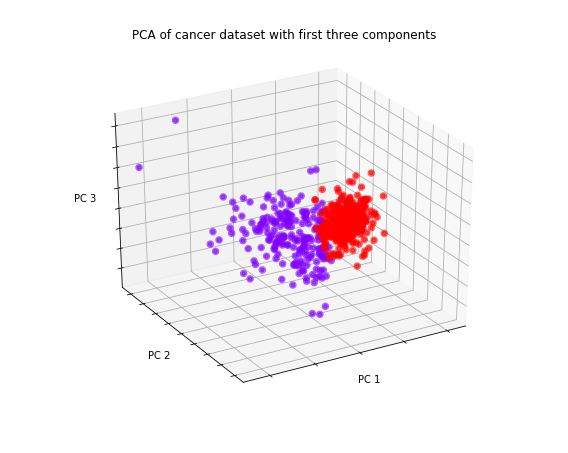

In [121]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=60)
colors = cm.rainbow(np.linspace(0,1,2))

for color, i  in zip(colors, labels.unique() ):
    ax.scatter(pca_X[labels == i, 0],pca_X[labels == i, 1],pca_X[labels == i, 2], color=color, alpha=.6, lw=3)
   
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title("PCA of cancer dataset with first three components")
ax.dist = 12
plt.savefig('pics/pca_3d_first3_cancer.png')
fig.show()

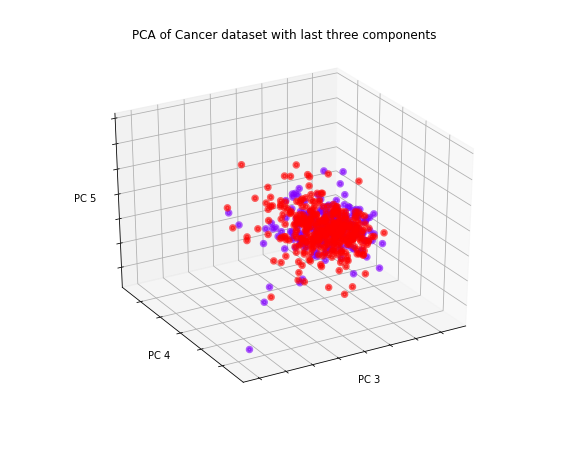

In [120]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=60)
colors = cm.rainbow(np.linspace(0,1,2))

for color, i  in zip(colors, labels.unique() ):
    ax.scatter(pca_X[labels == i, -3],pca_X[labels == i, -2],pca_X[labels == i, -1], color=color, alpha=.6, lw=3)
   
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('PC 3')
ax.set_ylabel('PC 4')
ax.set_zlabel('PC 5')
ax.set_title("PCA of Cancer dataset with last three components")
ax.dist = 12
plt.savefig('pics/pca_3d_last3_cancer.png')
fig.show()


In [34]:
tsne = manifold.TSNE(n_components=2, random_state=0)
pca_X_tsne = tsne.fit_transform(pca_X)

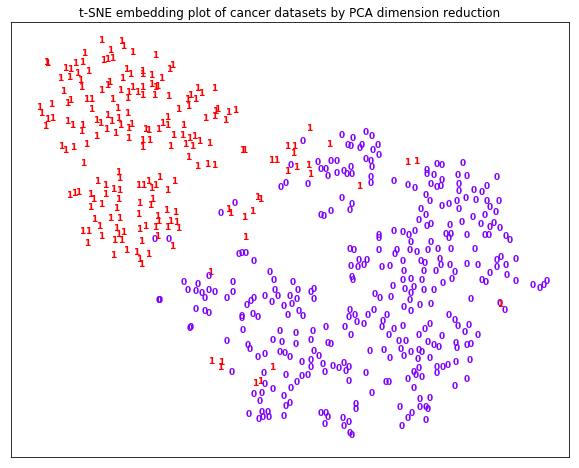

In [116]:
plot_embedding(pca_X_tsne, dlabels,                                  
            "t-SNE embedding plot of cancer datasets by PCA dimension reduction") 
plt.savefig('pics/pca_cancer_tsne.png')
plt.show() 

### Reproduce clustering from PCA data

In [36]:
kmeans_performance_df_pca = bench_k_means([i for i in range(2,11)],pca_X,dlabels,random_state = 6)
kmeans_performance_df_pca.n_clusters = kmeans_performance_df_pca.n_clusters.astype(str)
kmeans_performance_df_pca1 = kmeans_performance_df_pca.set_index('n_clusters')

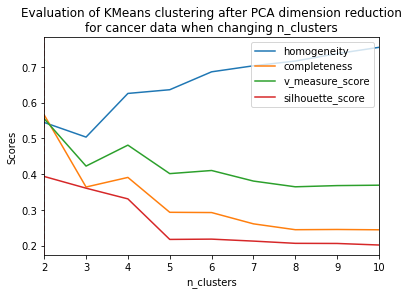

In [115]:
ax = kmeans_performance_df_pca1[['homogeneity','completeness','v_measure_score','silhouette_score']].plot()
ax.set_ylabel("Scores")
ax.set_title("Evaluation of KMeans clustering after PCA dimension reduction\nfor cancer data when changing n_clusters")
idxmin = [i for i in range(kmeans_performance_df_pca1.shape[0]) if kmeans_performance_df_pca1.index[i] == kmeans_performance_df_pca1.idxmax()['silhouette_score']]
ax.axvline(x=idxmin[0],color='r',ls='--',alpha=0.5)
ax.legend(loc = 'upper right')
plt.savefig('pics/KMs_pca_cancer.png')
plt.show()

In [38]:
EMs_performance_df_pca = bench_EMs([i for i in range(2,11)],pca_X,dlabels,random_state = 6)
EMs_performance_df_pca.n_components = EMs_performance_df_pca.n_components.astype(str)
EMs_performance_df_pca1 = EMs_performance_df_pca.set_index('n_components')

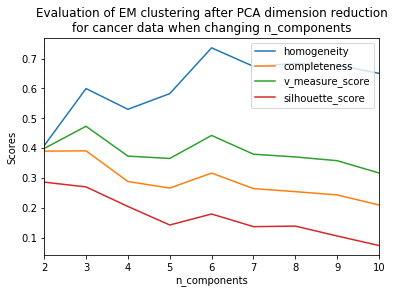

In [114]:
ax = EMs_performance_df_pca1[['homogeneity','completeness','v_measure_score','silhouette_score']].plot()
ax.set_ylabel("Scores")
ax.set_title("Evaluation of EM clustering after PCA dimension reduction\nfor cancer data when changing n_components")
idxmin = [i for i in range(EMs_performance_df1.shape[0]) if EMs_performance_df1.index[i] == EMs_performance_df1.idxmax()['silhouette_score']]
ax.axvline(x=idxmin[0],color='r',ls='--',alpha=0.5)
ax.legend(loc = 'upper right')
plt.savefig('pics/EMs_pca_cancer.png')
plt.show()

### ICA dimension reduction 
#### from above cross validation, it's better to do dimension reduction from  30 to 5

In [40]:
ica = FastICA(n_components=5,random_state=6)
ica.fit(features)
ica_X = ica.transform(features)
kurts = kurtosis(ica_X,axis = 0)

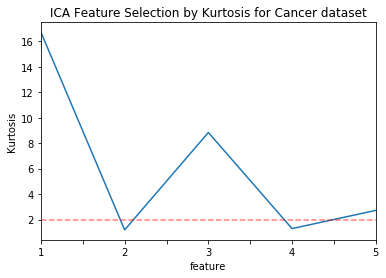

In [113]:
kurts_df = pd.DataFrame({'kurts' : kurts,'feature':[i for i in range(len(kurts))]})

kurts_df1 = kurts_df.sort_values(by = 'kurts',ascending = False)
ica_selected = kurts_df1.loc[kurts_df1['kurts'] >= 2,:].values[:,0].astype(int)
ica_X_selected = ica_X[:,list(ica_selected)]
kurts_df.feature = kurts_df.feature + 1
kurts_df.feature = kurts_df.feature.astype('str')
kurts_df2 = kurts_df.set_index('feature')
ax = kurts_df2.plot()
ax.set_ylabel("Kurtosis")
ax.set_title("ICA Feature Selection by Kurtosis for Cancer dataset")
ax.axhline(y=2,color='r',ls='--',alpha=0.5)
ax.legend().set_visible(False)
plt.savefig('pics/ica_kurtosis_cancer.png')
plt.show()

In [45]:
ica_X_selected.shape

(569, 3)

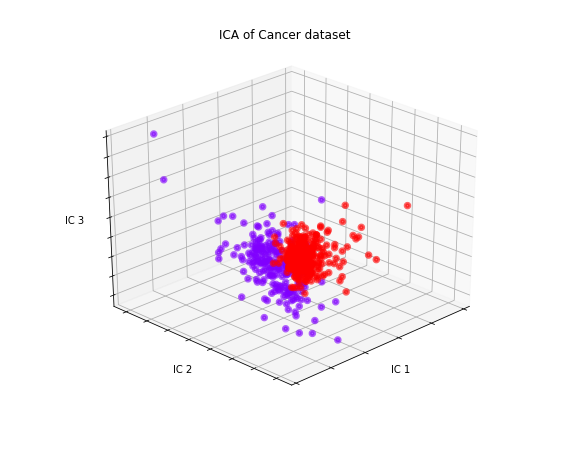

In [112]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=45)
colors = cm.rainbow(np.linspace(0,1,2))

for color, i  in zip(colors, labels.unique() ):
    ax.scatter(ica_X[labels == i, ica_selected[0]],ica_X[labels == i, ica_selected[1]],ica_X[labels == i, ica_selected[2]], color=color, alpha=.6, lw=3)
   
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
ax.set_zlabel('IC 3')
ax.set_title("ICA of Cancer dataset")
ax.dist = 12
plt.savefig('pics/ica_3d_cancer.png')
fig.show()

In [117]:
tsne = manifold.TSNE(n_components=2, random_state=0)
ica_X_tsne = tsne.fit_transform(ica_X_selected)

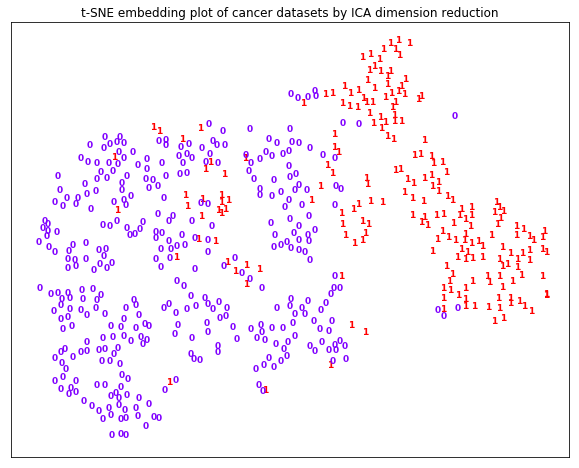

In [119]:
plot_embedding(ica_X_tsne, dlabels,                                  
            "t-SNE embedding plot of cancer datasets by ICA dimension reduction") 
plt.savefig('pics/ica_cancer_tsne.png')
plt.show() 

In [47]:
kmeans_performance_df_ica = bench_k_means([i for i in range(2,11)],ica_X_selected,dlabels,random_state = 6)
kmeans_performance_df_ica.n_clusters = kmeans_performance_df_ica.n_clusters.astype(str)
kmeans_performance_df_ica1 = kmeans_performance_df_ica.set_index('n_clusters')

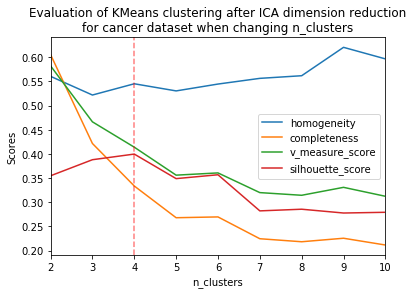

In [145]:
ax = kmeans_performance_df_ica1[['homogeneity','completeness','v_measure_score','silhouette_score']].plot()
ax.set_ylabel("Scores")
idxmax = [i for i in range(kmeans_performance_df_ica1.shape[0]) if kmeans_performance_df_ica1.index[i] == kmeans_performance_df_ica1.idxmax()['silhouette_score']]
ax.axvline(x=idxmax[0],color='r',ls='--',alpha=0.5)
ax.set_title("Evaluation of KMeans clustering after ICA dimension reduction\nfor cancer dataset when changing n_clusters")
plt.savefig('pics/KMs_ica_cancer.png')
plt.show()

In [49]:
EMs_performance_df_ica = bench_EMs([i for i in range(2,11)],ica_X_selected,dlabels,random_state = 6)
EMs_performance_df_ica.n_components = EMs_performance_df_ica.n_components.astype(str)
EMs_performance_df_ica1 = EMs_performance_df_ica.set_index('n_components')

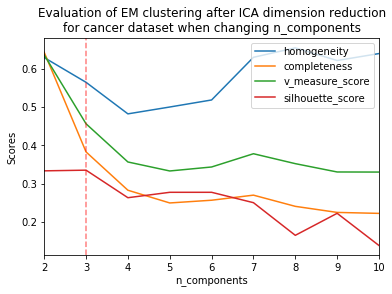

In [144]:
ax = EMs_performance_df_ica1[['homogeneity','completeness','v_measure_score','silhouette_score']].plot()
ax.set_ylabel("Scores")
idxmax = [i for i in range(EMs_performance_df_ica1.shape[0]) if EMs_performance_df_ica1.index[i] == EMs_performance_df_ica1.idxmax()['silhouette_score']]
ax.axvline(x=idxmax[0],color='r',ls='--',alpha=0.5)
ax.set_title("Evaluation of EM clustering after ICA dimension reduction\nfor cancer dataset when changing n_components")
plt.savefig('pics/EMs_ica_cancer.png')
plt.show()

### random project for dimension reduction from 30 to  5

In [51]:
rp = random_projection.SparseRandomProjection(n_components=5,random_state=6)
rp.fit(features)
rp_X = rp.transform(features)

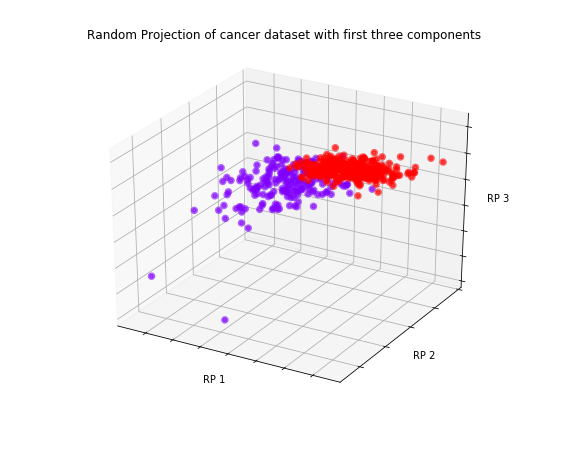

In [109]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=120)
colors = cm.rainbow(np.linspace(0,1,2))

for color, i  in zip(colors, labels.unique() ):
    ax.scatter(rp_X[labels == i, 0],rp_X[labels == i, 1],rp_X[labels == i, 2], color=color, alpha=.6, lw=3)
   
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('RP 1')
ax.set_ylabel('RP 2')
ax.set_zlabel('RP 3')
ax.set_title("Random Projection of cancer dataset with first three components")
ax.dist = 12
plt.savefig('pics/rp_3d_first3_cancer.png')
fig.show()

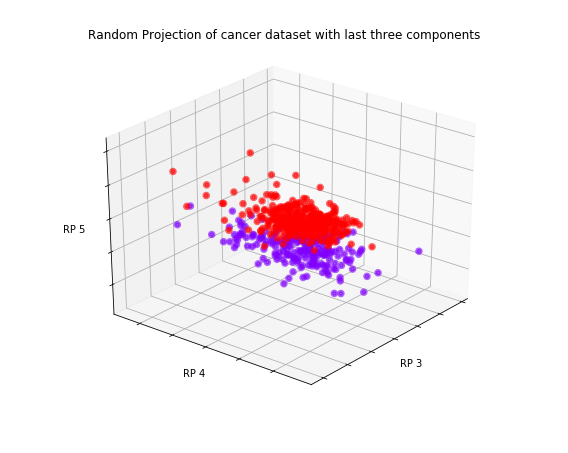

In [108]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=39)
colors = cm.rainbow(np.linspace(0,1,2))

for color, i  in zip(colors, labels.unique() ):
    ax.scatter(rp_X[labels == i, -3],rp_X[labels == i, -2],rp_X[labels == i, -1], color=color, alpha=.6, lw=3)
   
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('RP 3')
ax.set_ylabel('RP 4')
ax.set_zlabel('RP 5')
ax.set_title("Random Projection of cancer dataset with last three components")
ax.dist = 12
plt.savefig('pics/rp_3d_last3_cancer.png')
fig.show()

In [54]:
tsne = manifold.TSNE(n_components=2, random_state=0)
rp_X_tsne = tsne.fit_transform(rp_X)

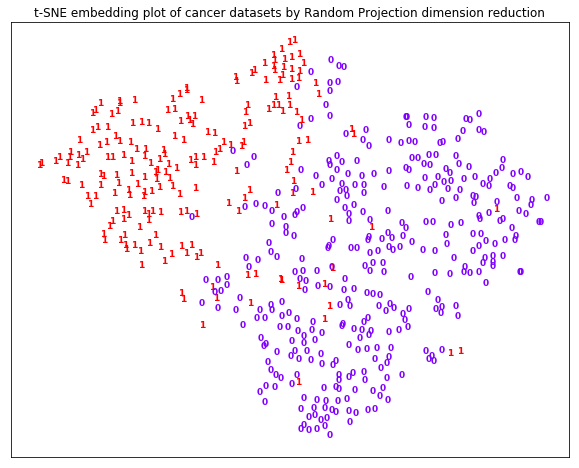

In [107]:
plot_embedding(rp_X_tsne, dlabels,                                  
            "t-SNE embedding plot of cancer datasets by Random Projection dimension reduction")  
plt.savefig('pics/rp_cancer_tsne.png')
plt.show() 

### Reproduce clustering from random projection data

In [56]:
kmeans_performance_df_rp = bench_k_means([i for i in range(2,11)],rp_X,dlabels,random_state = 6)
kmeans_performance_df_rp.n_clusters = kmeans_performance_df_rp.n_clusters.astype(str)
kmeans_performance_df_rp1 = kmeans_performance_df_rp.set_index('n_clusters')

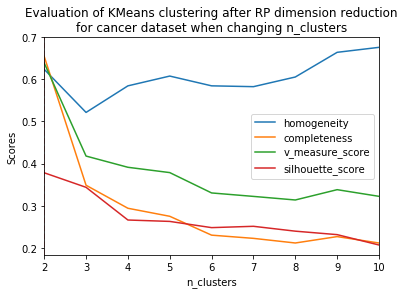

In [147]:
ax = kmeans_performance_df_rp1[['homogeneity','completeness','v_measure_score','silhouette_score']].plot()
ax.set_ylabel("Scores")
ax.set_title("Evaluation of KMeans clustering after RP dimension reduction\nfor cancer dataset when changing n_clusters")
idxmax = [i for i in range(kmeans_performance_df_rp1.shape[0]) if kmeans_performance_df_rp1.index[i] == kmeans_performance_df_rp1.idxmax()['silhouette_score']]
ax.axvline(x=idxmax[0],color='r',ls='--',alpha=0.5)
plt.savefig('pics/KMs_rp_cancer.png')
plt.show()

In [58]:
EMs_performance_df_rp = bench_EMs([i for i in range(2,11)],rp_X,dlabels,random_state = 6)
EMs_performance_df_rp.n_components = EMs_performance_df_rp.n_components.astype(str)
EMs_performance_df_rp1 = EMs_performance_df_rp.set_index('n_components')

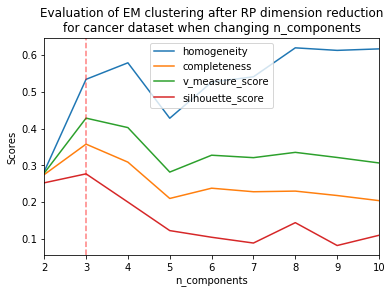

In [146]:
ax = EMs_performance_df_rp1[['homogeneity','completeness','v_measure_score','silhouette_score']].plot()
ax.set_ylabel("Scores")
ax.set_title("Evaluation of EM clustering after RP dimension reduction\nfor cancer dataset when changing n_components")
idxmax = [i for i in range(EMs_performance_df_rp1.shape[0]) if EMs_performance_df_rp1.index[i] == EMs_performance_df_rp1.idxmax()['silhouette_score']]
ax.axvline(x=idxmax[0],color='r',ls='--',alpha=0.5)
plt.savefig('pics/EMs_rp_cancer.png')
plt.show()

### Factor analysis for dimension reduction from 30 to 3

In [60]:
fa = FactorAnalysis(n_components=3,random_state=6)
fa_X = fa.fit(features,dlabels).transform(features)

In [61]:
fa_X.shape

(569, 3)

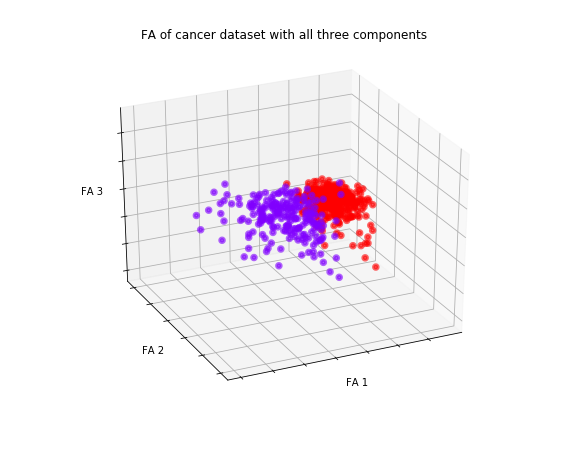

In [104]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=65)
colors = cm.rainbow(np.linspace(0,1,2))

for color, i  in zip(colors, labels.unique() ):
    ax.scatter(fa_X[labels == i, 0],fa_X[labels == i, 1],fa_X[labels == i, 2], color=color, alpha=.6, lw=3)
   
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('FA 1')
ax.set_ylabel('FA 2')
ax.set_zlabel('FA 3')
ax.set_title("FA of cancer dataset with all three components")
ax.dist = 12
plt.savefig('pics/fa3d_cancer.png')
fig.show()

In [63]:
tsne = manifold.TSNE(n_components=2, random_state=0)

fa_X_tsne = tsne.fit_transform(fa_X)

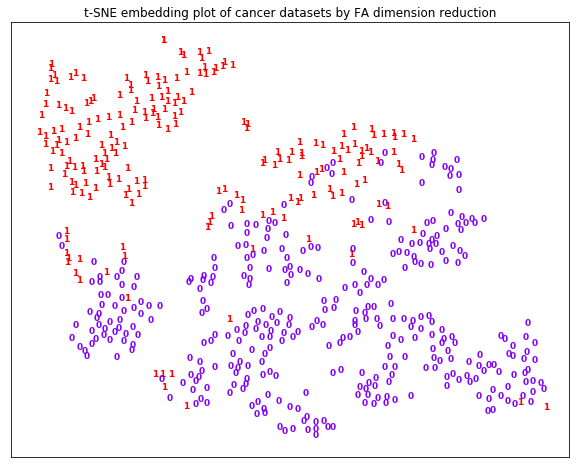

In [103]:
plot_embedding(fa_X_tsne, dlabels,                                  
            "t-SNE embedding plot of cancer datasets by FA dimension reduction")                           
plt.savefig('pics/fa_cancer_sne.png')
plt.show() 

### Reproduce Kmeans and EM clustering using FA data

In [65]:
kmeans_performance_df_fa = bench_k_means([i for i in range(2,11)],fa_X,dlabels,random_state = 6)
kmeans_performance_df_fa.n_clusters = kmeans_performance_df_fa.n_clusters.astype(str)
kmeans_performance_df_fa1 = kmeans_performance_df_fa.set_index('n_clusters')

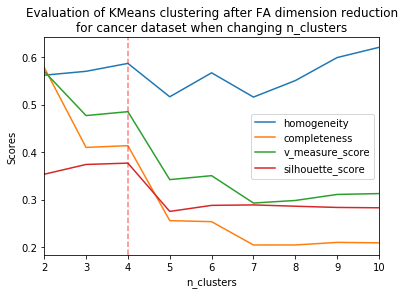

In [102]:
ax = kmeans_performance_df_fa1[['homogeneity','completeness','v_measure_score','silhouette_score']].plot()
ax.set_ylabel("Scores")
ax.set_title("Evaluation of KMeans clustering after FA dimension reduction\nfor cancer dataset when changing n_clusters")
idxmax = [i for i in range(kmeans_performance_df_fa1.shape[0]) if kmeans_performance_df_fa1.index[i] == kmeans_performance_df_fa1.idxmax()['silhouette_score']]
ax.axvline(x=idxmax[0],color='r',ls='--',alpha=0.5)
plt.savefig('pics/kmeans_fa_cancer.png')
plt.show()

In [67]:
EMs_performance_df_fa = bench_EMs([i for i in range(2,11)],fa_X,dlabels,random_state = 6)
EMs_performance_df_fa.n_components = EMs_performance_df_fa.n_components.astype(str)
EMs_performance_df_fa1 = EMs_performance_df_fa.set_index('n_components')

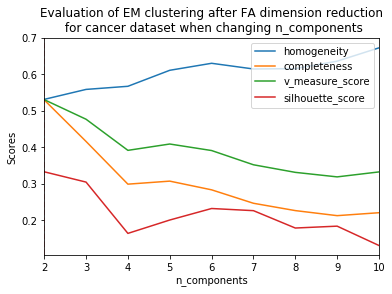

In [101]:
ax = EMs_performance_df_fa1[['homogeneity','completeness','v_measure_score','silhouette_score']].plot()
ax.set_ylabel("Scores")
ax.set_title("Evaluation of EM clustering after FA dimension reduction\n for cancer dataset when changing n_components")
idxmax = [i for i in range(EMs_performance_df_fa1.shape[0]) if EMs_performance_df_fa1.index[i] == EMs_performance_df_fa1.idxmax()['silhouette_score']]
ax.axvline(x=idxmax[0],color='r',ls='--',alpha=0.5)
ax.legend(loc = 'upper right')
plt.savefig('pics/EM_fa_cancer.png')
plt.show()

In [69]:
n_components = [i for i in range(2,31)]
repeats = 100
rmse_reconstr_error_pca = []
stds_reconstr_error_pca = []
for n in n_components:
    RMSEs = []
    for i in range(repeats):
        pca_v = PCA(n_components=n, svd_solver='full')
        projected = pca_v.fit_transform(features)
        reconstructed = pca_v.inverse_transform(projected)
        rmse = np.sqrt(np.mean((reconstructed - features)**2))
        RMSEs.append(rmse)
    rmse_reconstr_error_pca.append(np.mean(RMSEs))
    stds_reconstr_error_pca.append(np.std(RMSEs))  

In [70]:

rmse_reconstr_error_rp = []
stds_reconstr_error_rp = []
for n in n_components:
    RMSEs = []
    for i in range(repeats):
        rp_v = random_projection.SparseRandomProjection(n_components=n)
        projected = rp_v.fit_transform(features)
        pinv_matrix = np.linalg.pinv(rp_v.components_.toarray())
        reconstructed = projected @ np.transpose(pinv_matrix)
        rmse = np.sqrt(np.mean((reconstructed - features)**2))
        RMSEs.append(rmse)
    rmse_reconstr_error_rp.append(np.mean(RMSEs))
    stds_reconstr_error_rp.append(np.std(RMSEs))   
        

In [71]:
def errorfill(x, y, yerr, color=None, title = None, alpha_fill=0.3, ax=None,label = None):
    ax = ax if ax is not None else plt.gca()

    if np.isscalar(yerr) or len(yerr) == len(y):
        ymin = y - 2 * yerr
        ymax = y + 2 * yerr
    elif len(yerr) == 2:
        ymin, ymax = yerr
    ax.plot(x, y, color=color,label=label)
    if title:
        ax.set_title(title)
    ax.set_xlabel('Number of Components')
    ax.set_ylabel('RMSE of Reconstruction Error')
    ax.fill_between(x, ymax, ymin, color=color, alpha=alpha_fill)
    ax.legend(loc='upper right')

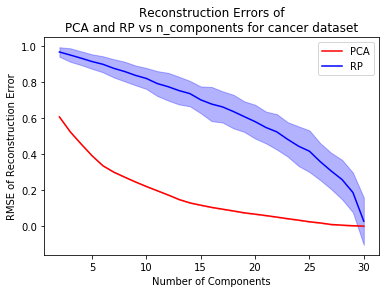

In [100]:
title = "Reconstruction Errors of\nPCA and RP vs n_components for cancer dataset"
errorfill(n_components,np.array(rmse_reconstr_error_pca), np.array(stds_reconstr_error_pca),color = 'r',title = title,label='PCA')
#errorfill(n_components,np.array(rmse_reconstr_error_ica), np.array(stds_reconstr_error_ica),color = 'g',title = title,label='ICA')
errorfill(n_components,np.array(rmse_reconstr_error_rp), np.array(stds_reconstr_error_rp),color = 'b',title = title,label='RP')
#errorfill(n_components,np.array(rmse_reconstr_error_fa), np.array(stds_reconstr_error_fa),color = 'g',title = title,label='FA')
plt.savefig('pics/reconstruction_error_cancer.png')
plt.show()

In [90]:
def bench_k_means_DRs(Xs, Y, names, random_state):
    running_time = []
    sumOfDistance = []
    homogeneity_score = []
    completeness_score = []
    v_measure_score = []
    adjusted_rand_score = []
    adjusted_mutual_info_score = []
    silhouette_score = []
    for X in Xs:
        estimator = KMeans(n_clusters = 2, random_state = random_state)
        t0 = time()
        estimator.fit(X)
        running_time.append(time() - t0)
        sumOfDistance.append(estimator.inertia_)
        homogeneity_score.append(metrics.homogeneity_score( Y, estimator.labels_))
        completeness_score.append(metrics.completeness_score( Y, estimator.labels_))
        v_measure_score.append(metrics.v_measure_score( Y, estimator.labels_))
        adjusted_rand_score.append(metrics.adjusted_rand_score( Y, estimator.labels_)) 
        adjusted_mutual_info_score.append(metrics.adjusted_mutual_info_score( Y,  estimator.labels_)) 
        silhouette_score.append(metrics.silhouette_score(X, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=X.shape[0]))
    
    performance_df = pd.DataFrame({"Names":names,
                                   "running_time":running_time,
                                  "sum_of_distances":sumOfDistance,
                                  "homogeneity":homogeneity_score,
                                  "completeness":completeness_score,
                                  "v_measure_score":v_measure_score,
                                  "adjusted_rand_score":adjusted_rand_score,
                                  "adjusted_mutual_info_score": adjusted_mutual_info_score,
                                  "silhouette_score":silhouette_score
                                  })
    return performance_df
   

In [73]:
def bench_EMs_DRs( Xs, Y, names, random_state):
    running_time = []
    BIC = []
    homogeneity_score = []
    completeness_score = []
    v_measure_score = []
    adjusted_rand_score = []
    adjusted_mutual_info_score = []
    silhouette_score = []
    for X in Xs:
        estimator = mixture.GaussianMixture(n_components = 2, random_state = random_state)
        t0 = time()
        estimator.fit(X)
        predicted = estimator.predict(X)
        running_time.append(time() - t0)
        BIC.append(estimator.bic(X))
        homogeneity_score.append(metrics.homogeneity_score( Y, predicted))
        completeness_score.append(metrics.completeness_score( Y, predicted))
        v_measure_score.append(metrics.v_measure_score( Y, predicted))
        adjusted_rand_score.append(metrics.adjusted_rand_score( Y, predicted)) 
        adjusted_mutual_info_score.append(metrics.adjusted_mutual_info_score( Y,  predicted)) 
        silhouette_score.append(metrics.silhouette_score(X, predicted,
                                      metric='euclidean',
                                      sample_size=X.shape[0]))
    
    performance_df = pd.DataFrame({"Names":names,
                                   "running_time":running_time,
                                  "BIC":BIC,
                                  "homogeneity":homogeneity_score,
                                  "completeness":completeness_score,
                                  "v_measure_score":v_measure_score,
                                  "adjusted_rand_score":adjusted_rand_score,
                                  "adjusted_mutual_info_score": adjusted_mutual_info_score,
                                  "silhouette_score":silhouette_score
                                  })
    return performance_df

In [74]:
names = ['original', 'pca', 'ica', 'rp', 'fa']
Xs = [features, pca_X, ica_X_selected, rp_X, fa_X]

In [93]:
km_dr_df = bench_k_means_DRs(Xs,dlabels, names, 6)
km_dr_df.set_index('Names',inplace = True)

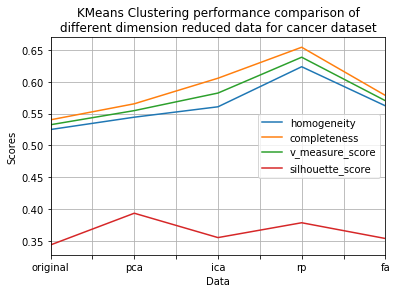

In [97]:

ax = km_dr_df[['homogeneity','completeness','v_measure_score','silhouette_score']].plot()
ax.set_ylabel('Scores')
ax.set_xlabel('Data')
ax.set_title('KMeans Clustering performance comparison of\ndifferent dimension reduced data for cancer dataset')
ax.grid()
plt.savefig('pics/kmeans_dr_all_cancer.png')
plt.show()

In [76]:
em_dr_df = bench_EMs_DRs(Xs,dlabels, names, 6)

In [83]:
em_dr_df.set_index('Names',inplace = True)

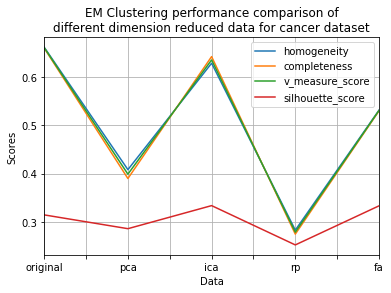

In [98]:
ax = em_dr_df[['homogeneity','completeness','v_measure_score','silhouette_score']].plot()
ax.set_ylabel('Scores')
ax.set_xlabel('Data')
ax.set_title('EM Clustering performance comparison of\ndifferent dimension reduced data for cancer dataset')
ax.grid()
plt.savefig('pics/EMs_dr_all_cancer.png')
plt.show()

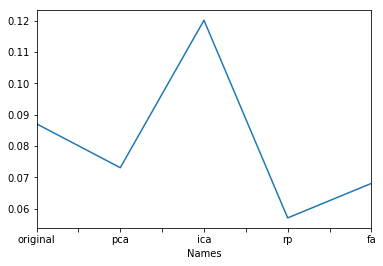

In [143]:
km_dr_df['running_time'].plot()

In [132]:
estimator = mixture.GaussianMixture(n_components = 2, random_state = 6)

In [133]:
estimator.fit(features)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=6, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [134]:
estimator.lower_bound_

0.16933579995933659

In [137]:
def bench_EMs2(Ks, X, Y, random_state):
    running_time = []
    LL = []
    homogeneity_score = []
    completeness_score = []
    v_measure_score = []
    adjusted_rand_score = []
    adjusted_mutual_info_score = []
    silhouette_score = []
    for K in Ks:
        estimator = mixture.GaussianMixture(n_components = K, random_state = random_state)
        t0 = time()
        estimator.fit(X)
        predicted = estimator.predict(X)
        running_time.append(time() - t0)
        LL.append(estimator.lower_bound_)
        homogeneity_score.append(metrics.homogeneity_score( Y, predicted))
        completeness_score.append(metrics.completeness_score( Y, predicted))
        v_measure_score.append(metrics.v_measure_score( Y, predicted))
        adjusted_rand_score.append(metrics.adjusted_rand_score( Y, predicted)) 
        adjusted_mutual_info_score.append(metrics.adjusted_mutual_info_score( Y,  predicted)) 
        silhouette_score.append(metrics.silhouette_score(X, predicted,
                                      metric='euclidean',
                                      sample_size=X.shape[0]))
        
    performance_df = pd.DataFrame({"n_components":Ks,
                                   "running_time":running_time,
                                  "LogLikelihood":LL,
                                  "homogeneity":homogeneity_score,
                                  "completeness":completeness_score,
                                  "v_measure_score":v_measure_score,
                                  "adjusted_rand_score":adjusted_rand_score,
                                  "adjusted_mutual_info_score": adjusted_mutual_info_score,
                                  "silhouette_score":silhouette_score
                                  })
    return performance_df

In [138]:
EMs_performance_df_pca2 = bench_EMs2([i for i in range(2,11)],pca_X,dlabels,random_state = 6)
EMs_performance_df_pca2.n_components = EMs_performance_df_pca2.n_components.astype(str)
EMs_performance_df_pca12 = EMs_performance_df_pca2.set_index('n_components')

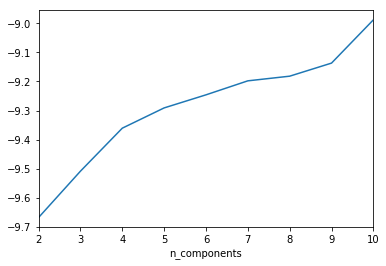

In [139]:
EMs_performance_df_pca12['LogLikelihood'].plot()

In [148]:
km2 =KMeans(n_clusters = 2, random_state = 6)
km2.fit(features)
km2_cluster = km2.predict(features)

In [151]:
km2_cluster == dlabels

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False,  True, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False,

In [152]:
em2 = mixture.GaussianMixture(n_components = 2, random_state = 6)
em2.fit(features)
em2_cluster = em2.predict(features)

In [153]:
em2_cluster == dlabels

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,